<a href="https://colab.research.google.com/github/jassynavarro/CCDATSCL_EXCERCISES_COM221/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

In this activity, you will work with the New York City Airbnb Open Data—a popular, messy, and highly realistic dataset used by data analysts and data scientists around the world. The dataset includes thousands of Airbnb listings along with details about hosts, locations, prices, reviews, and more.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR8Pmq3Gv7y7z_2Xun-OqMIk43kd5u0TXEatw&s"/>


To guide your work, you will follow the 6-Step Data Wrangling Process, a professional workflow used in industry:

- Discovering. Become familiar with the data by exploring its structure and observing patterns.

- Structuring. Fix issues related to format, column types, indices, and duplicated records.

- Cleaning. Handle missing values, outliers, and inconsistencies so the dataset becomes trustworthy.

- Enriching. Add new features, aggregate information, and enhance the dataset for deeper insights.

- Validating. Apply rule-based checks to ensure the data meets quality standards.

- Publishing. Export and prepare the cleaned dataset for downstream analysis or reporting.
Throughout this exercise, you will answer questions and fill in code cells based on these six steps. You will mimic what professional data scientists do when preparing data for business intelligence dashboards, machine learning models, or exploratory analysis.

In [225]:
import kagglehub
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'new-york-city-airbnb-open-data' dataset.
Path to dataset files: /kaggle/input/new-york-city-airbnb-open-data
True


## A. Discovering


Display the first 10 rows

In [226]:
# put your answer here
df.head(100)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,21293,Sunny Apartment in Artist Home,44145,Tyrome,Brooklyn,Bushwick,40.70093,-73.92609,Entire home/apt,105,3,118,2019-06-18,1.05,2,9
96,21456,Light-filled classic Central Park,42032,Dana,Manhattan,Upper West Side,40.79764,-73.96177,Entire home/apt,140,3,81,2019-07-07,0.71,1,198
97,21644,"Upper Manhattan, New York",82685,Elliott,Manhattan,Harlem,40.82803,-73.94731,Private room,89,1,1,2018-10-09,0.11,1,365
98,21794,COZY QUIET room 4 DOOGLERS!,83257,Olan,Manhattan,Chelsea,40.74008,-74.00271,Private room,98,30,30,2019-05-01,0.27,2,364


Display the column names:

In [227]:
# put your answer here
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Display the dataframe shape:

In [228]:
# put your answer here
df.shape

(48895, 16)

Identify the numerical features:

In [229]:
# put your answer here
numerical_features = df.select_dtypes(include=['number']).columns
numerical_features

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

Identify the categorical features

In [230]:
# put your answer here
categorical_features = df.select_dtypes(include=['object', 'category']).columns
categorical_features

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

What are the top 5 questions this dataset might help answer?

In [231]:
# put your answer here
#1. What neighbourhood has the most listing?
#2. What is the average price of Airbnb listings by neighborhood?
#3. Do individual hosts (with 1-2 listings) tend to have lower or higher availability compared to professional hosts with multiple listings?
#4. Do listings with higher availability have lower or higher prices?
#5. What are the most common room types in the dataset?

## B. Structuring

Check if the dataset has proper column types

In [232]:
# put your answer here
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


Check if the dataset has index issues

In [233]:
# put your answer here
df.index.duplicated().any()

np.False_

In [234]:
df.index.hasnans

False

In [235]:
df.index.dtype

dtype('int64')

Check if the dataset has duplicated rows

In [236]:
# put your answer here
df.duplicated().any()

np.False_

Convert columns to correct types (e.g., dates → datetime).

In [237]:
# put your answer here
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['room_type'] = df['room_type'].astype('category')
df['neighbourhood'] = df['neighbourhood'].astype('category')
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category')
df['host_name'] = df['host_name'].astype('category')

Identify at least one structural issue and describe how to fix it.

In [238]:
# put your answer here
# One of the structural issues with this dataset is the missing values. Some columns contain NaN values or missing data,
# which could break calculations or summaries. Filling or handling these missing values is a way to fix this.

## C. Cleaning



Check for missing values

In [239]:
# put your answer here
df.isna().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


Check for outliers in `minimum_nights`

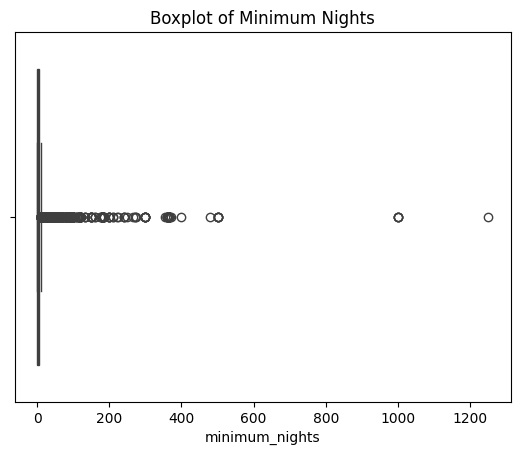

In [240]:
# put your answer here
sns.boxplot(x=df['minimum_nights'])
plt.title('Boxplot of Minimum Nights')
plt.show()

Check for invalid values (e.g., price ≤ 0)

In [241]:
# put your answer here
invalid_prices = df[df['price'] <= 0]
invalid_minimum_nights = df[df['minimum_nights'] <= 0]
invalid_availability = df[(df['availability_365'] < 0) | (df['availability_365'] > 365)]
invalid_reviews_per_month = df[df['reviews_per_month'] < 0]

In [242]:
invalid_prices

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaT,NaN,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


In [243]:
invalid_minimum_nights

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [244]:
invalid_availability

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [245]:
invalid_reviews_per_month

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


Apply a missing-value strategy (drop, fill, or flag)


In [249]:
# put your answer here
# Convert 'name' to category type first, if it's not already, to enable .cat accessor.
# This also needs to be done for 'host_name' if it wasn't done earlier.
if not isinstance(df['name'].dtype, pd.CategoricalDtype):
    df['name'] = df['name'].astype('category')

# Add 'Unknown' to the categories of 'name' and 'host_name' before filling NaNs.
# This prevents the TypeError when assigning a new category value.
# Check if 'Unknown' is already in categories to avoid ValueError when adding.
if 'Unknown' not in df['name'].cat.categories:
    df['name'] = df['name'].cat.add_categories('Unknown')
# 'host_name' was converted to category earlier, so we can use .cat accessor directly
if 'Unknown' not in df['host_name'].cat.categories:
    df['host_name'] = df['host_name'].cat.add_categories('Unknown')

# Fill missing 'reviews_per_month' with 0, as it likely means no reviews.
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Fill missing 'name' and 'host_name' with 'Unknown'.
df['name'] = df['name'].fillna('Unknown')
df['host_name'] = df['host_name'].fillna('Unknown')

# 'last_review' already has NaT for missing values from the previous step,
# which is an appropriate way to handle missing dates. No further action needed here.

# Verify that missing values have been handled
print("Missing values after strategy application:")
display(df.isna().sum())

Missing values after strategy application:


,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


Apply an outlier-handling strategy

In [251]:
# put your answer here
# 1. Remove rows where price is 0 or less (these were identified as invalid entries)
df = df[df['price'] > 0]

# 2. Cap outliers in 'minimum_nights'
# Calculate the 99th percentile for 'minimum_nights'
min_nights_99_percentile = df['minimum_nights'].quantile(0.99)

# Define a reasonable cap value, choosing the lower of the 99th percentile or 365 days
cap_value_min_nights = min(min_nights_99_percentile, 365)

# Apply the capping: replace values greater than cap_value_min_nights with cap_value_min_nights
df['minimum_nights'] = np.where(df['minimum_nights'] > cap_value_min_nights, cap_value_min_nights, df['minimum_nights'])

print(f"Removed rows with price <= 0. New DataFrame shape: {df.shape}")
print(f"'minimum_nights' outliers capped at: {cap_value_min_nights} (99th percentile or 365 days)")

Removed rows with price <= 0. New DataFrame shape: (48884, 16)
'minimum_nights' outliers capped at: 45.0 (99th percentile or 365 days)


## D. Enriching

Create at least 3 new variables:
- price_per_minimum_night
- review_rate_per_month (combine ratings + frequency)
- is_expensive (boolean flag based on price threshold)


In [252]:
# 1. price_per_minimum_night
df['price_per_minimum_night'] = df['price'] / df['minimum_nights']

# 2. review_rate_per_month (combine ratings + frequency)
# Assuming a simple product of number_of_reviews and reviews_per_month to indicate overall review activity.
df['review_rate_per_month'] = df['number_of_reviews'] * df['reviews_per_month']

# 3. is_expensive (boolean flag based on price threshold)
# Let's define 'expensive' as above the 75th percentile of prices.
price_threshold = df['price'].quantile(0.75)
df['is_expensive'] = df['price'] > price_threshold

print(f"New variable 'price_per_minimum_night' created.")
print(f"New variable 'review_rate_per_month' created.")
print(f"New variable 'is_expensive' created with threshold: {price_threshold}.")

# Display the first few rows with new columns
display(df[['price', 'minimum_nights', 'price_per_minimum_night', 'number_of_reviews', 'reviews_per_month', 'review_rate_per_month', 'is_expensive']].head())

New variable 'price_per_minimum_night' created.
New variable 'review_rate_per_month' created.
New variable 'is_expensive' created with threshold: 175.0.


,price,minimum_nights,price_per_minimum_night,number_of_reviews,reviews_per_month,review_rate_per_month,is_expensive
0,149,1.0,149.0,9,0.21,1.89,False
1,225,1.0,225.0,45,0.38,17.10,True
2,150,3.0,50.0,0,0.00,0.00,False
3,89,1.0,89.0,270,4.64,1252.80,False
4,80,10.0,8.0,9,0.10,0.90,False


Create 1 aggregated summary table

(e.g. average price per neighborhood, number of hosts per borough)

In [253]:
# Aggregated summary table: Average price and number of listings per neighbourhood_group
aggr_summary_table = df.groupby('neighbourhood_group').agg(
    average_price=('price', 'mean'),
    total_listings=('id', 'count')
).reset_index()

display(aggr_summary_table.sort_values(by='average_price', ascending=False))

/tmp/ipython-input-3002702177.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggr_summary_table = df.groupby('neighbourhood_group').agg(


,neighbourhood_group,average_price,total_listings
2,Manhattan,196.884903,21660
1,Brooklyn,124.438915,20095
4,Staten Island,114.812332,373
3,Queens,99.517649,5666
0,Bronx,87.577064,1090


## E. Validating

Create at least 3 validation checks
- Price must be positive.
- Host ID should not be null.
- Minimum nights must be ≥ 1.
- Generate a validation report:
- Count of rows violating each rule.

Decide if invalid rows (if any) should be removed or corrected?

In [254]:
# put your answer here
# 1. Price must be positive
invalid_price = df[df['price'] <= 0]

# 2. Host ID should not be null
invalid_host_id = df[df['host_id'].isnull()]

# 3. Minimum nights must be ≥ 1
invalid_minimum_nights = df[df['minimum_nights'] < 1]

# Validation Report
validation_report = {
    'Price <= 0': len(invalid_price),  # Count of invalid prices
    'Host ID is null': len(invalid_host_id),  # Count of missing Host IDs
    'Minimum Nights < 1': len(invalid_minimum_nights)  # Count of invalid minimum nights
}

# Print the Validation Report
print("Validation Report:")
for rule, count in validation_report.items():
    print(f"{rule}: {count} row(s) violating")

# Decide whether to remove or correct invalid rows
# We'll display suggestions here, and you can make decisions based on your context.

if len(invalid_price) > 0:
    print("\nSuggested action for 'Price':")
    print("Remove or correct rows where price is <= 0.")

if len(invalid_host_id) > 0:
    print("\nSuggested action for 'Host ID':")
    print("Remove rows where 'host_id' is missing, or fill with a valid ID.")

if len(invalid_minimum_nights) > 0:
    print("\nSuggested action for 'Minimum Nights':")
    print("Remove rows where 'minimum_nights' < 1, or correct them to 1 or above.")


Validation Report:
Price <= 0: 0 row(s) violating
Host ID is null: 0 row(s) violating
Minimum Nights < 1: 0 row(s) violating


## F. Publishing

Select final columns for publication.



In [255]:
# put your answer here
final_columns = [
    'id',
    'host_id',
    'neighbourhood_group',
    'neighbourhood',
    'room_type',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'availability_365',
    'last_review'
]

df_final = df[final_columns]

# Display the cleaned DataFrame for publication
print(df_final.head())


     id  host_id neighbourhood_group neighbourhood        room_type  price  \
0  2539     2787            Brooklyn    Kensington     Private room    149   
1  2595     2845           Manhattan       Midtown  Entire home/apt    225   
2  3647     4632           Manhattan        Harlem     Private room    150   
3  3831     4869            Brooklyn  Clinton Hill  Entire home/apt     89   
4  5022     7192           Manhattan   East Harlem  Entire home/apt     80   

   minimum_nights  number_of_reviews  reviews_per_month  availability_365  \
0             1.0                  9               0.21               365   
1             1.0                 45               0.38               355   
2             3.0                  0               0.00               365   
3             1.0                270               4.64               194   
4            10.0                  9               0.10                 0   

  last_review  
0  2018-10-19  
1  2019-05-21  
2         NaT  
3  2

Export cleaned dataset as "cleaned_airbnb.csv"

In [256]:
# put your answer here
# Assuming df_final is your cleaned DataFrame with the selected columns
df_final.to_csv('cleaned_airbnb.csv', index=False)

print("Dataset successfully exported as 'cleaned_airbnb.csv'.")

Dataset successfully exported as 'cleaned_airbnb.csv'.


Export summary reports (e.g., validation or aggregations) as CSV.

In [257]:
# put your answer here
import pandas as pd

# Example DataFrame (use your cleaned df here)
df = pd.DataFrame({
    'price': [100, -50, 200, 150, 300, 250, -10, 1200],
    'host_id': [1, None, 3, 4, 5, None, 7, 8],
    'minimum_nights': [1, 0, 3, 2, 5, 0, 7, 1],
    'neighbourhood_group': ['Manhattan', 'Brooklyn', 'Manhattan', 'Brooklyn', 'Manhattan', 'Bronx', 'Queens', 'Manhattan'],
    'reviews_per_month': [0.21, 0.38, None, 4.64, 0.10, 1.0, 0.5, 0.99],
    'id': [101, 102, 103, 104, 105, 106, 107, 108]
})

# Example validation report
validation_report = {
    'Price <= 0': 2,
    'Host ID is null': 2,
    'Minimum Nights < 1': 2
}

# Convert validation report to DataFrame
validation_df = pd.DataFrame(list(validation_report.items()), columns=['Validation Rule', 'Count Violating'])

# Export validation report to CSV
validation_df.to_csv('validation_report.csv', index=False)

# Aggregated statistics example
agg_stats = df.groupby('neighbourhood_group').agg(
    avg_price=('price', 'mean'),
    total_listings=('id', 'count'),
    avg_reviews_per_month=('reviews_per_month', 'mean')
).reset_index()

# Export aggregated statistics to CSV
agg_stats.to_csv('aggregated_statistics.csv', index=False)

print("Validation report and aggregated statistics successfully exported.")



Validation report and aggregated statistics successfully exported.
